In [3]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import rc
data_csv = pd.read_csv('C:/Project/Data/data.csv', encoding='euc-kr')
data_csv = data_csv.apply(pd.to_numeric, errors='coerce').fillna(0)
data_csv = data_csv.astype({'temp':'float32'})
data_csv = data_csv.astype({'visiblity':'float32'})

C:\Users\Jeon\AppData\Local\Temp\ipykernel_8336\933317516.py:10: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data_csv = pd.read_csv('C:/Project/Data/data.csv', encoding='euc-kr')


In [109]:
feature_columns = []
for header in ['cloud','min_cloud_hei','rain','temp','visiblity','wind_dire','wind_spd']:
    feature_columns.append(tf.feature_column.numeric_column(header))

In [110]:
def create_dataset(dataframe, batch_size=80):
    dataframe = dataframe.copy()            
    labels = dataframe.pop('class')
    return tf.data.Dataset.from_tensor_slices((dict(dataframe),labels)).shuffle(buffer_size=len(dataframe))\
    .batch(batch_size)

In [111]:
train, test = train_test_split(data_csv, test_size=0.3)
train_ds = create_dataset(train)
test_ds = create_dataset(test)

In [112]:
model = tf.keras.Sequential([
    tf.keras.layers.DenseFeatures(feature_columns=feature_columns),
    tf.keras.layers.Dense(units=60, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [113]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])
history=model.fit(train_ds, validation_data=test_ds, epochs=100, use_multiprocessing=True)

Epoch 1/100
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
1244/1254 [============================>.] - ETA: 0s - loss: 5.2561 - accuracy: 0.6149WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'cloud': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=int64>, 'min_cloud_hei': <tf.Tensor 'ExpandDims_1:0' shape=(None, 1) dtype=int64>, 'rain': <tf.Tensor 'ExpandDims_2:0' shape=(None, 1) dtype=int64>, 'temp': <tf.Tensor 'ExpandDims_3:0' shape=(None, 1) dtype=float32>, 'visiblity': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=float32>, 'wind_dire': <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) dtype=int64>, 'wind_spd': <tf.Tensor 'ExpandDims_6:0' shape=(None, 1) dtype=int64>}
Consider rewriting this model with the Functional API.
1254/1254 [==============================] - 2s 2ms/step - loss: 5.2212 - accuracy: 0.6153 - val_loss: 0.5692 - val_accur

Epoch 43/100
1254/1254 [==============================] - 2s 2ms/step - loss: 0.5030 - accuracy: 0.7558 - val_loss: 0.4810 - val_accuracy: 0.7704
Epoch 44/100
1254/1254 [==============================] - 2s 2ms/step - loss: 0.5030 - accuracy: 0.7559 - val_loss: 0.4775 - val_accuracy: 0.7707
Epoch 45/100
1254/1254 [==============================] - 2s 2ms/step - loss: 0.5013 - accuracy: 0.7568 - val_loss: 0.4775 - val_accuracy: 0.7740
Epoch 46/100
1254/1254 [==============================] - 2s 1ms/step - loss: 0.5018 - accuracy: 0.7570 - val_loss: 0.4717 - val_accuracy: 0.7696
Epoch 47/100
1254/1254 [==============================] - 2s 2ms/step - loss: 0.5020 - accuracy: 0.7567 - val_loss: 0.4773 - val_accuracy: 0.7683
Epoch 48/100
1254/1254 [==============================] - 2s 1ms/step - loss: 0.4998 - accuracy: 0.7592 - val_loss: 0.4721 - val_accuracy: 0.7771
Epoch 49/100
1254/1254 [==============================] - 2s 2ms/step - loss: 0.5009 - accuracy: 0.7564 - val_loss: 0.4785 -

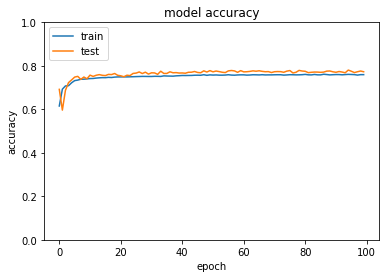

In [114]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim((0,1))
plt.legend(['train','test'],loc='upper left');

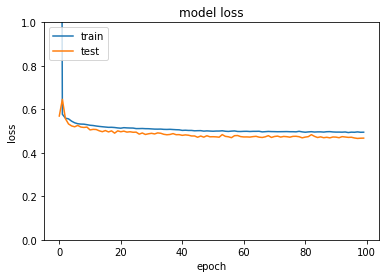

In [115]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim((0,1))
plt.legend(['train','test'],loc='upper left');